In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
# Function to convert image to grayscale
def rgb_to_grayscale(rgb_image):
    height, width, _ = rgb_image.shape
    gray_image = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            r, g, b = rgb_image[i, j]
            gray_value = int(0.299 * r + 0.587 * g + 0.114 * b)
            gray_image[i, j] = gray_value

    return gray_image

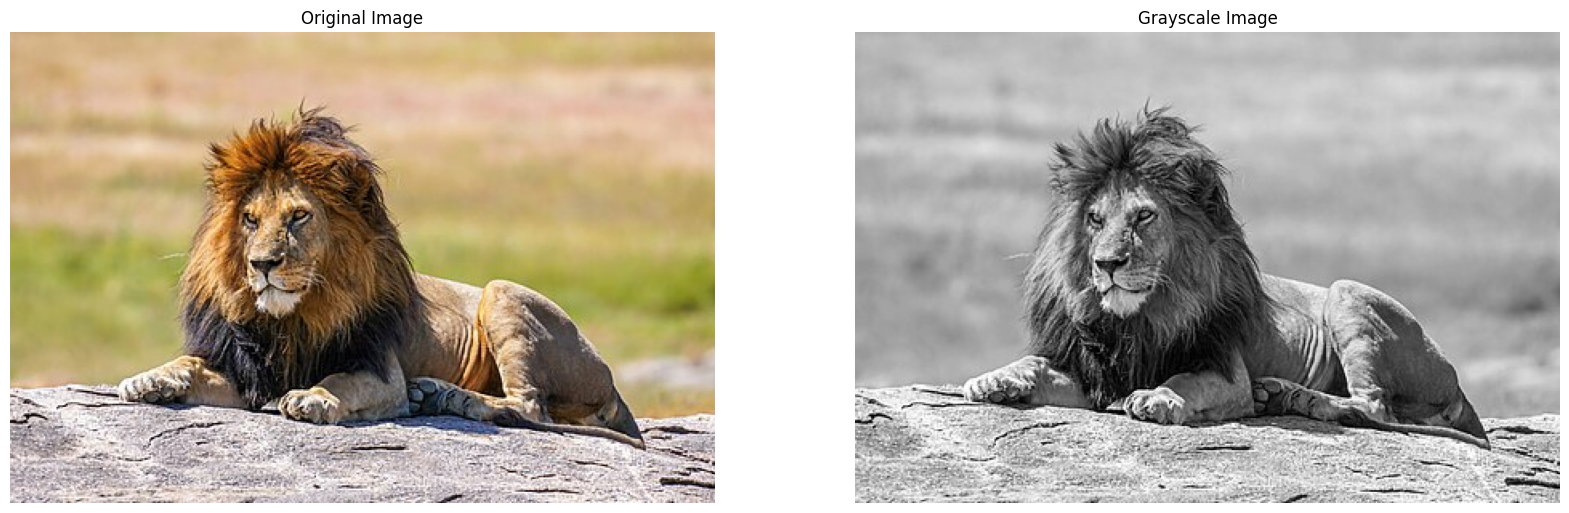

In [4]:
# Function to read and convert image
def load_image(image_path):
    image = Image.open(image_path)
    image = np.array(image)
    return image

def rgb_to_grayscale(rgb_image):
    return np.dot(rgb_image[...,:3], [0.2989, 0.5870, 0.1140])

# Load image using pillow
image_path = 'Lion.jpg'
rgb_image = load_image(image_path)

# Convert to grayscale
gray_image = rgb_to_grayscale(rgb_image)

# Display original and grayscale images to compare
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

In [5]:
# Convolution function
def convolve(image, kernel):
    # Get image and kernal sizes
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculate the padding size
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    # Create the output image
    output = np.zeros_like(image)
    
    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            # Element-wise multiplication and sum
            output[i, j] = np.sum(region * kernel)
    
    return output

In [6]:
# Define Gaussian kernel
gaussian_k = np.array([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]
]) / 273


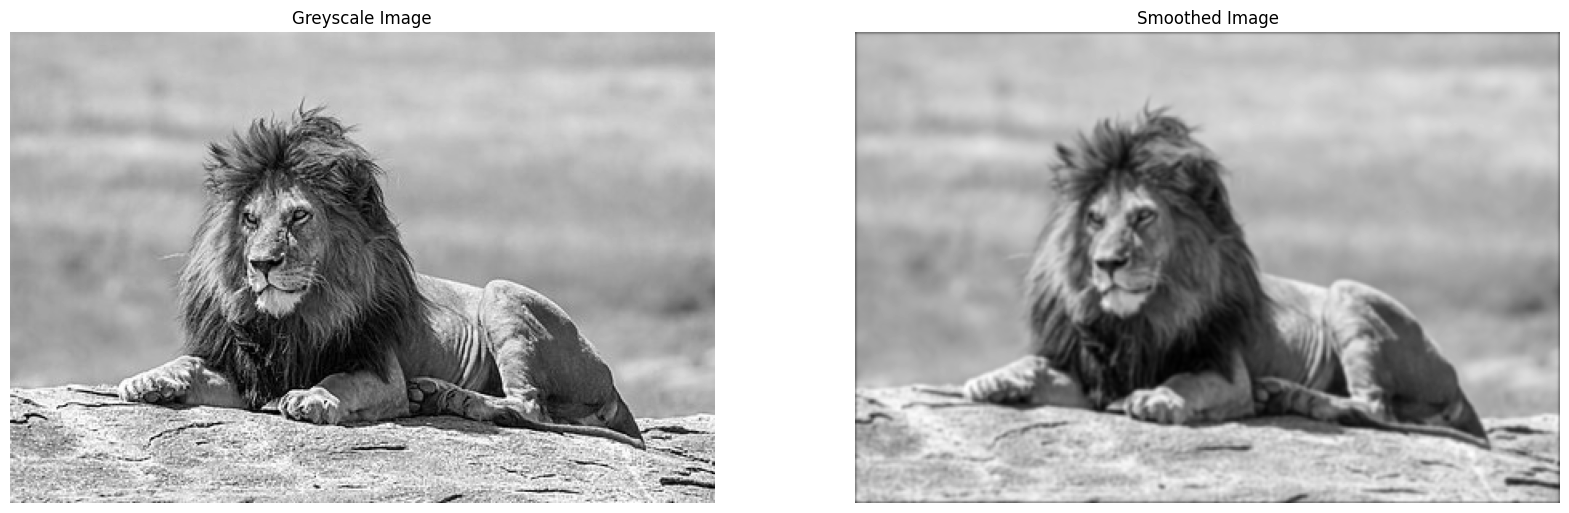

In [7]:
# Call Gaussian smoothing
smoothed_image = convolve(gray_image, gaussian_k)

# Display the smoothed and grayscale image
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Greyscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')
plt.show()

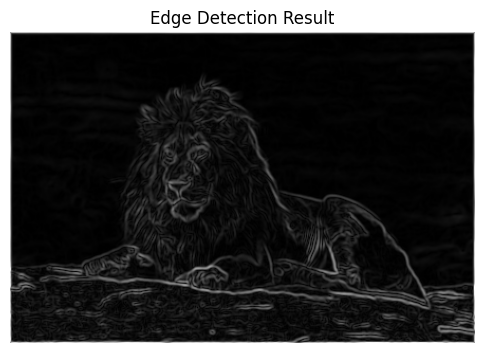

In [8]:
# Define Sobel kernels
Kx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

Ky = np.array([[-1, -2, -1],
               [0, 0, 0],
               [1, 2, 1]])

# Compute gradients along the x and y axes
Gx = convolve(smoothed_image, Kx)

Gy = convolve(smoothed_image, Ky)

# Compute the gradient magnitude
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

# Normalize the gradient magnitude
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
gradient_magnitude = gradient_magnitude.astype(np.uint8)

# Display the image
plt.figure(figsize=(6,6))
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Edge Detection Result')
plt.axis('off')
plt.show()

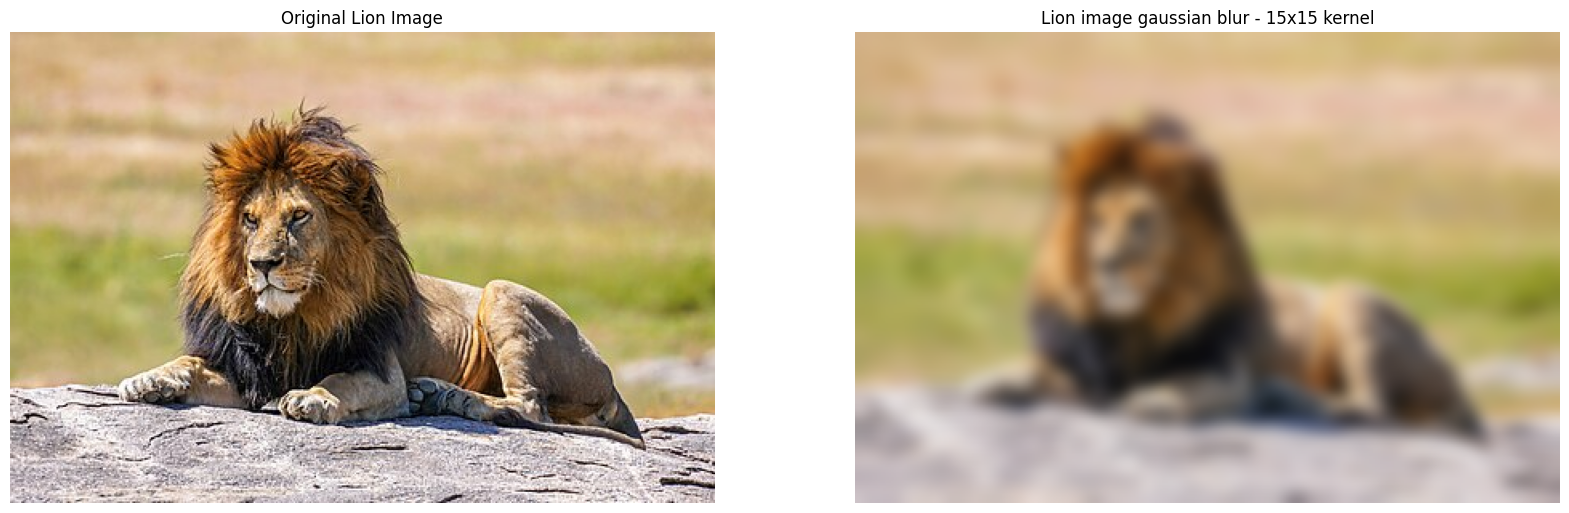

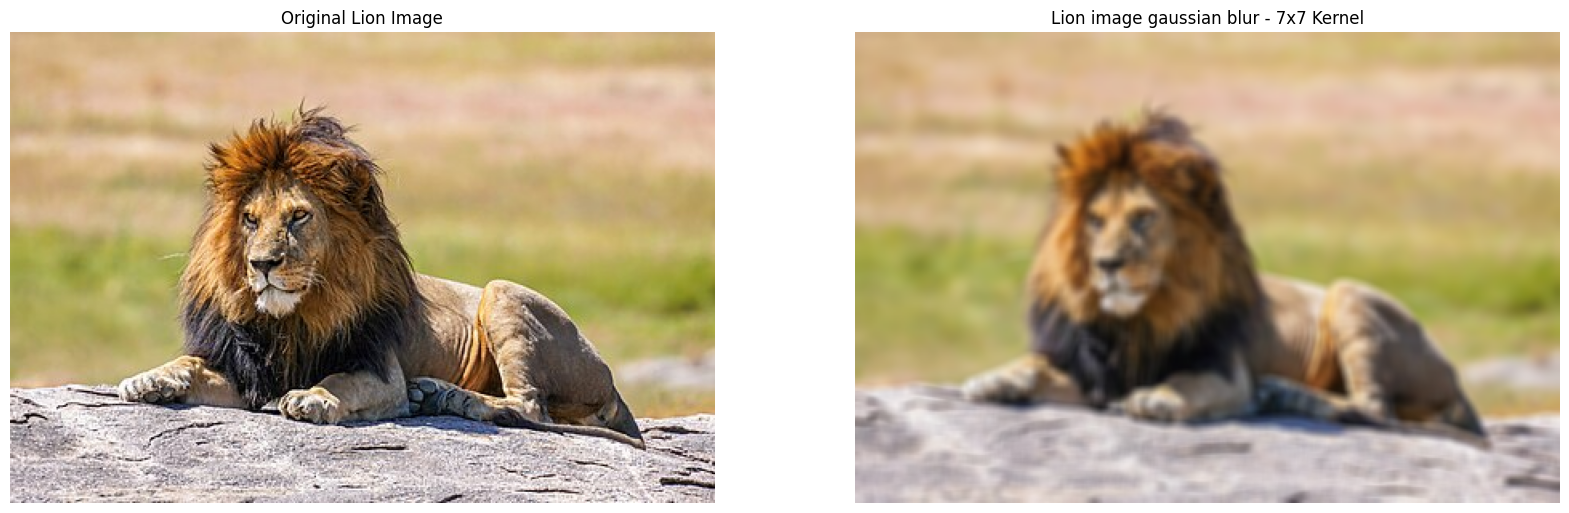

In [ ]:
# Problem B
# Applying a Low-Pass Filter to Image A to Obtain Image B

import cv2

# kernel and frequency (sigma is the std of the gausian kernel)
low_pass = cv2.GaussianBlur(rgb_image,(23,23),5)

# low pass with smaller kernel 
low_pass_small = cv2.GaussianBlur(rgb_image,(7,7),3)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Original Lion Image")

plt.imshow(rgb_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Lion image gaussian blur - 23x23 kernel')
plt.imshow(low_pass)
plt.axis('off')

plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Original Lion Image")
plt.imshow(rgb_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Lion image gaussian blur - 7x7 Kernel')
plt.imshow(low_pass_small)
plt.axis('off')

plt.show()



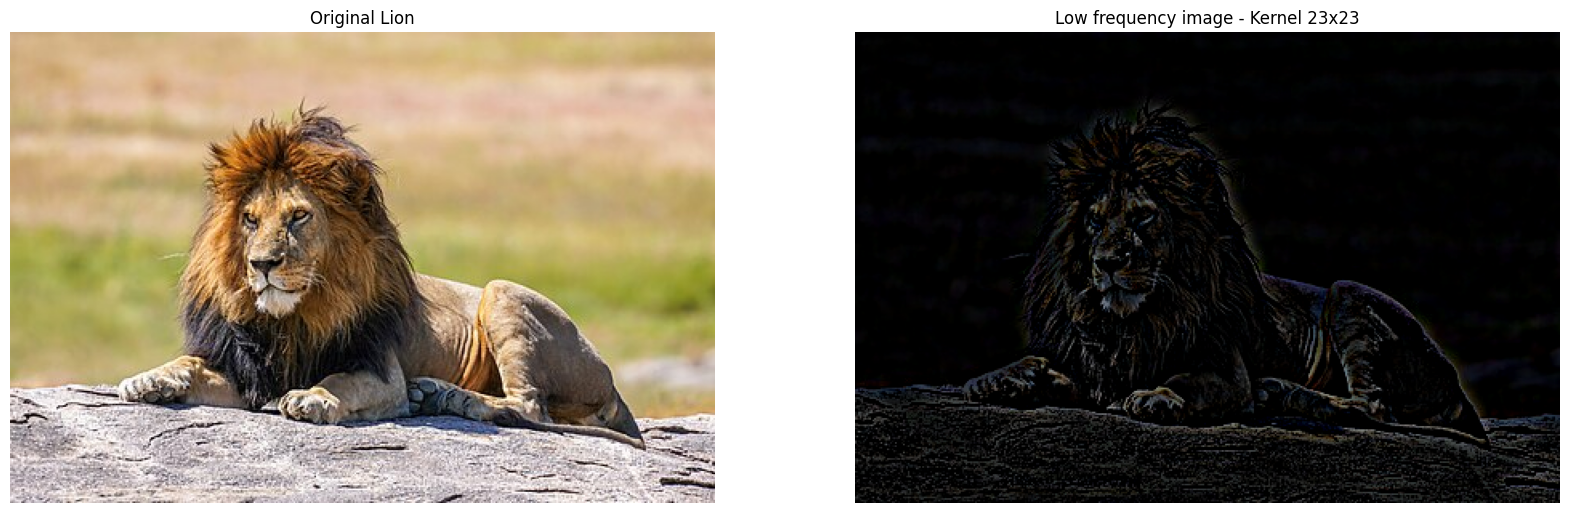

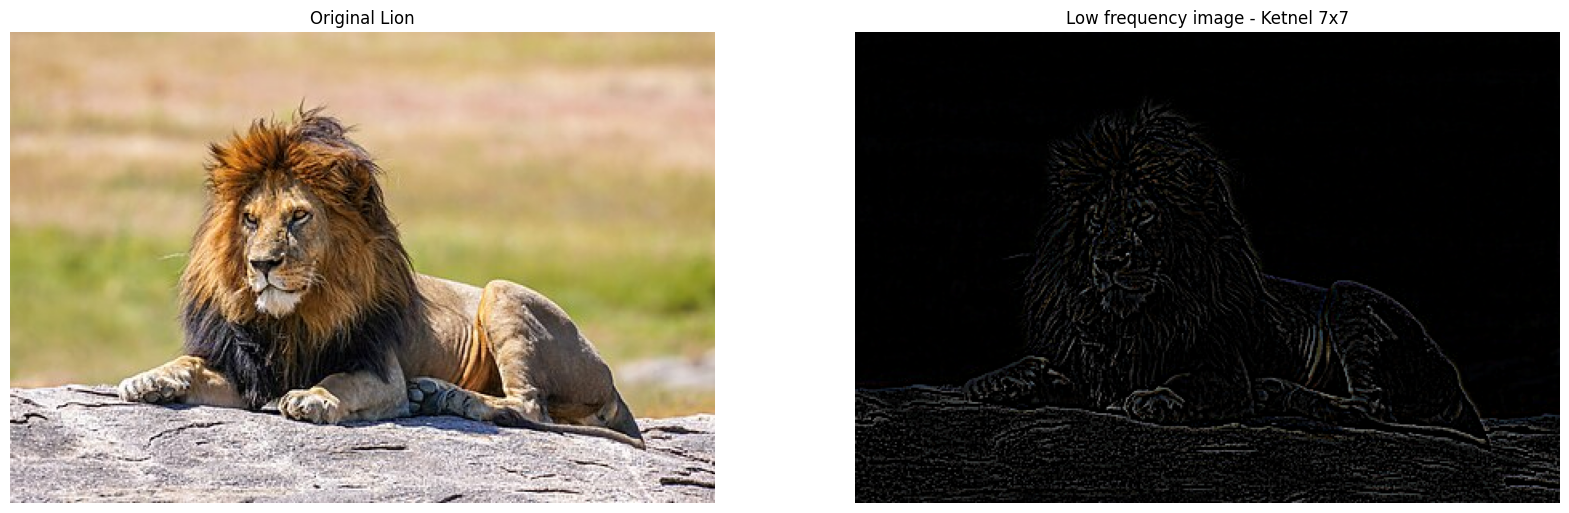

In [ ]:
# Apply high pass filter to our lion image.

# setting low frequency
low_blur = cv2.GaussianBlur(rgb_image, (23,23),5)

low_blur_small = cv2.GaussianBlur(rgb_image,(7,7),3)

# High pass
high_pass = cv2.subtract(rgb_image, low_blur)

#High pass with smaller kernel
high_pass_small = cv2.subtract(rgb_image, low_blur_small)


# Display the results
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Original Lion')
plt.imshow(rgb_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Low frequency image - Kernel 23x23')
plt.imshow(high_pass)
plt.axis('off')

plt.show()


# Display the results for the smaller kernel
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Original Lion')
plt.imshow(rgb_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Low frequency image - Ketnel 7x7')
plt.imshow(high_pass_small)
plt.axis('off')

plt.show()


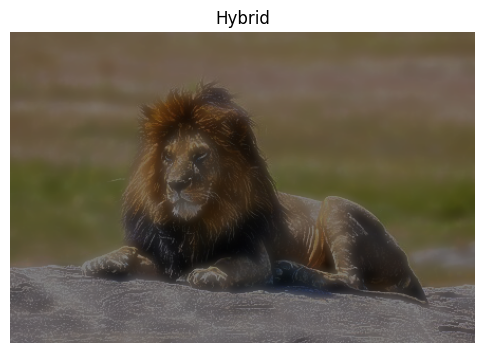

In [11]:
# Hybrid Paart

hybrid = cv2.addWeighted(low_pass,0.5,high_pass,0.5,0)


plt.figure(figsize=(6,6))
plt.imshow(hybrid,cmap='grey')
plt.title('Hybrid')
plt.axis('off')
plt.show()




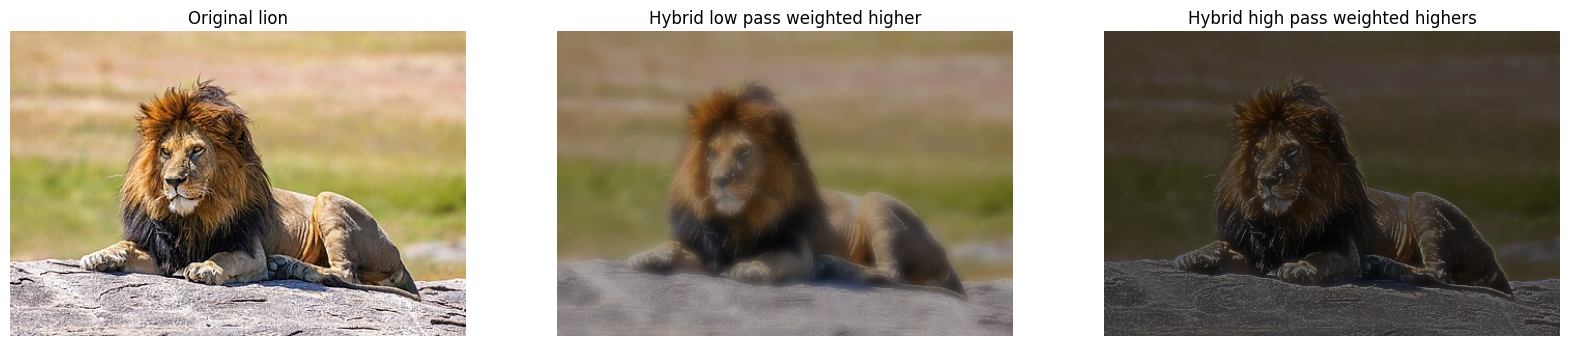

In [12]:

hybrid_varient1 = cv2.addWeighted(low_pass,0.7,high_pass,0.3,0)
hybrid_varient2 = cv2.addWeighted(low_pass,0.3,high_pass,0.7,0)

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('Original lion')
plt.imshow(rgb_image)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Hybrid low pass weighted higher')
plt.imshow(hybrid_varient1)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Hybrid high pass weighted highers')
plt.imshow(hybrid_varient2)
plt.axis('off')

plt.show()

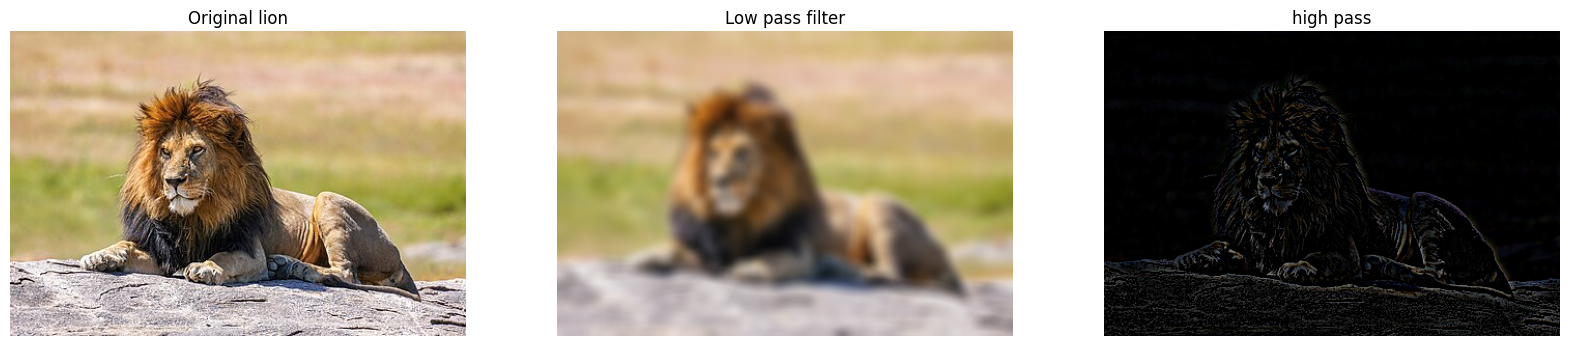

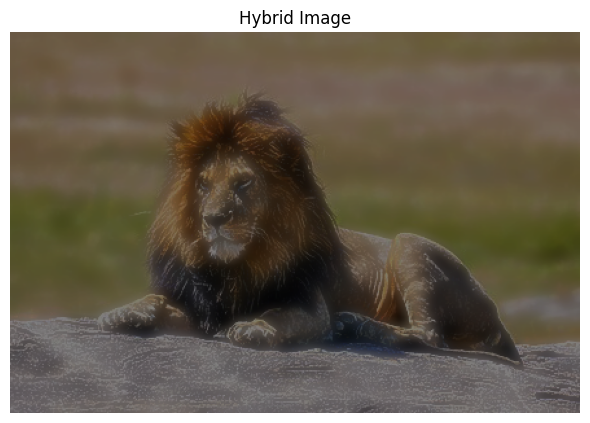

In [13]:
##Final plot to show all the layouts and filters

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('Original lion')
plt.imshow(rgb_image)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Low pass filter')
plt.imshow(low_pass)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('high pass')
plt.imshow(high_pass)
plt.axis('off')


plt.figure(figsize=(6, 6))
plt.title('Hybrid Image')
plt.imshow(hybrid)
plt.axis('off')




plt.tight_layout()
plt.show()